# tarin Dataset

In [33]:
import pandas as pd
df=pd.read_csv("train.csv")

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# EDA

## map of missing values

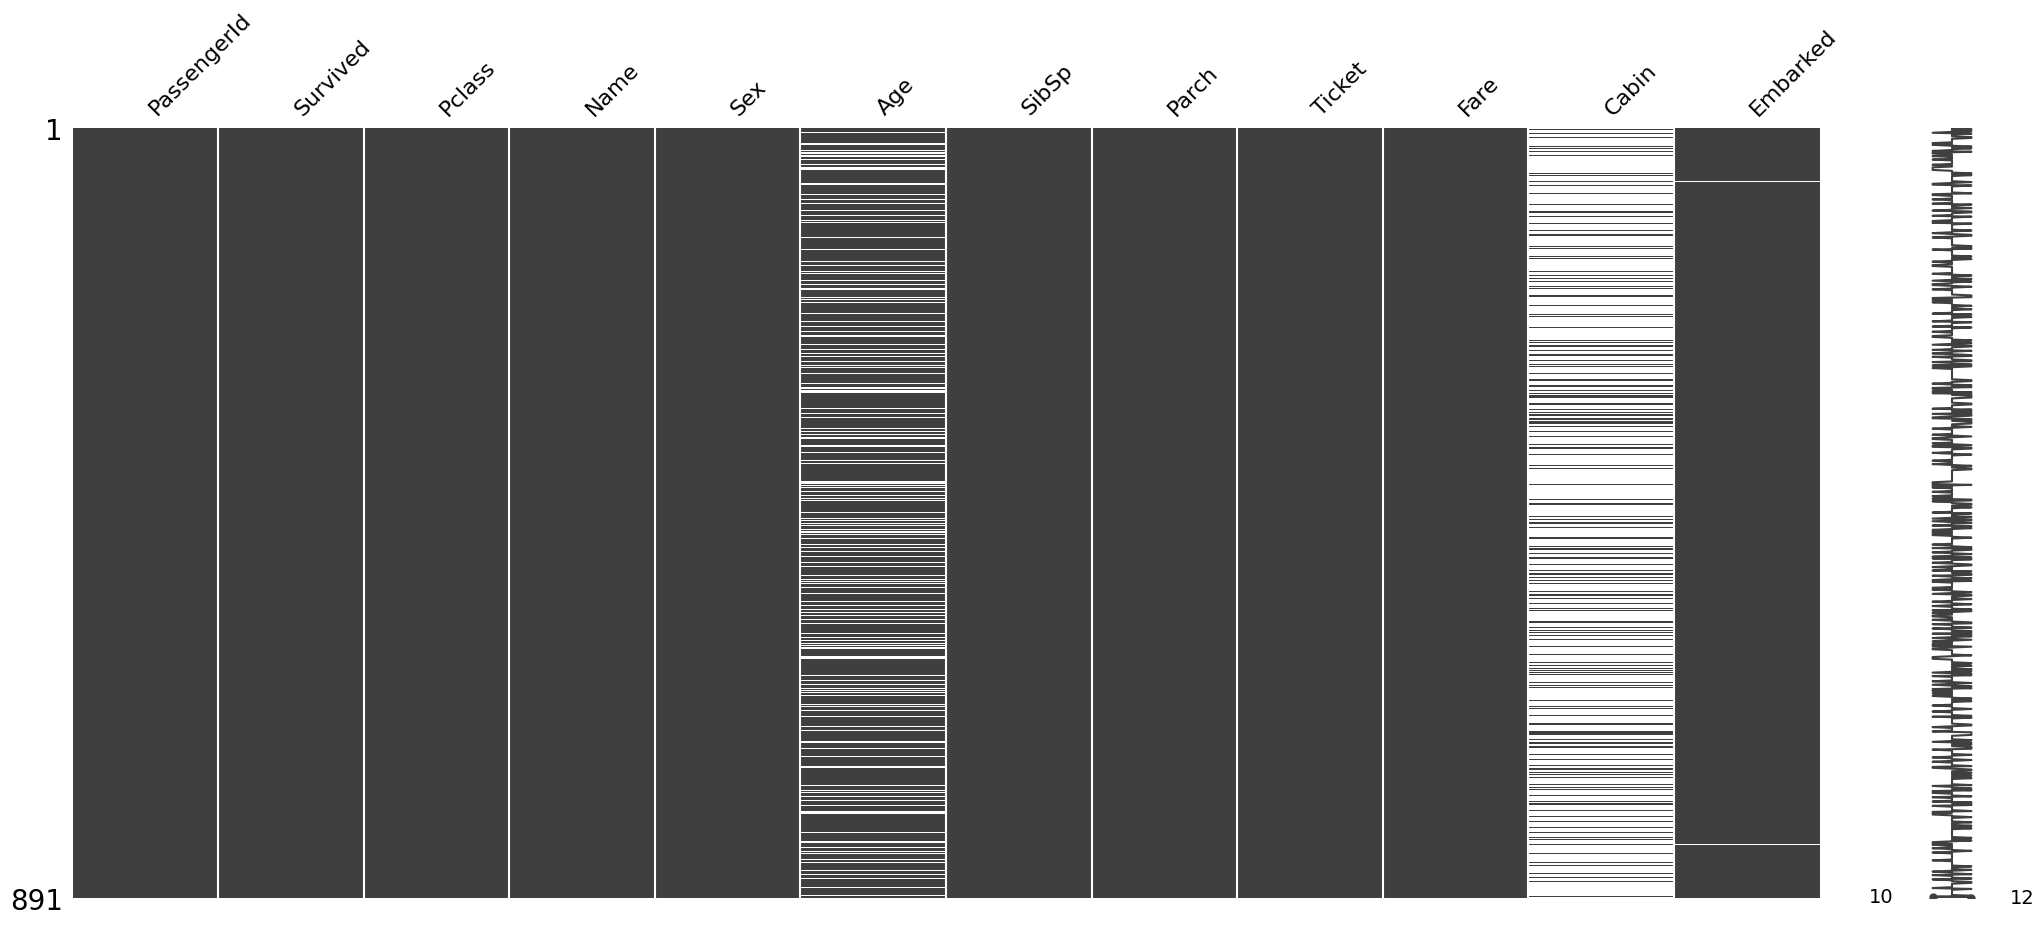

In [38]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df)
plt.show()

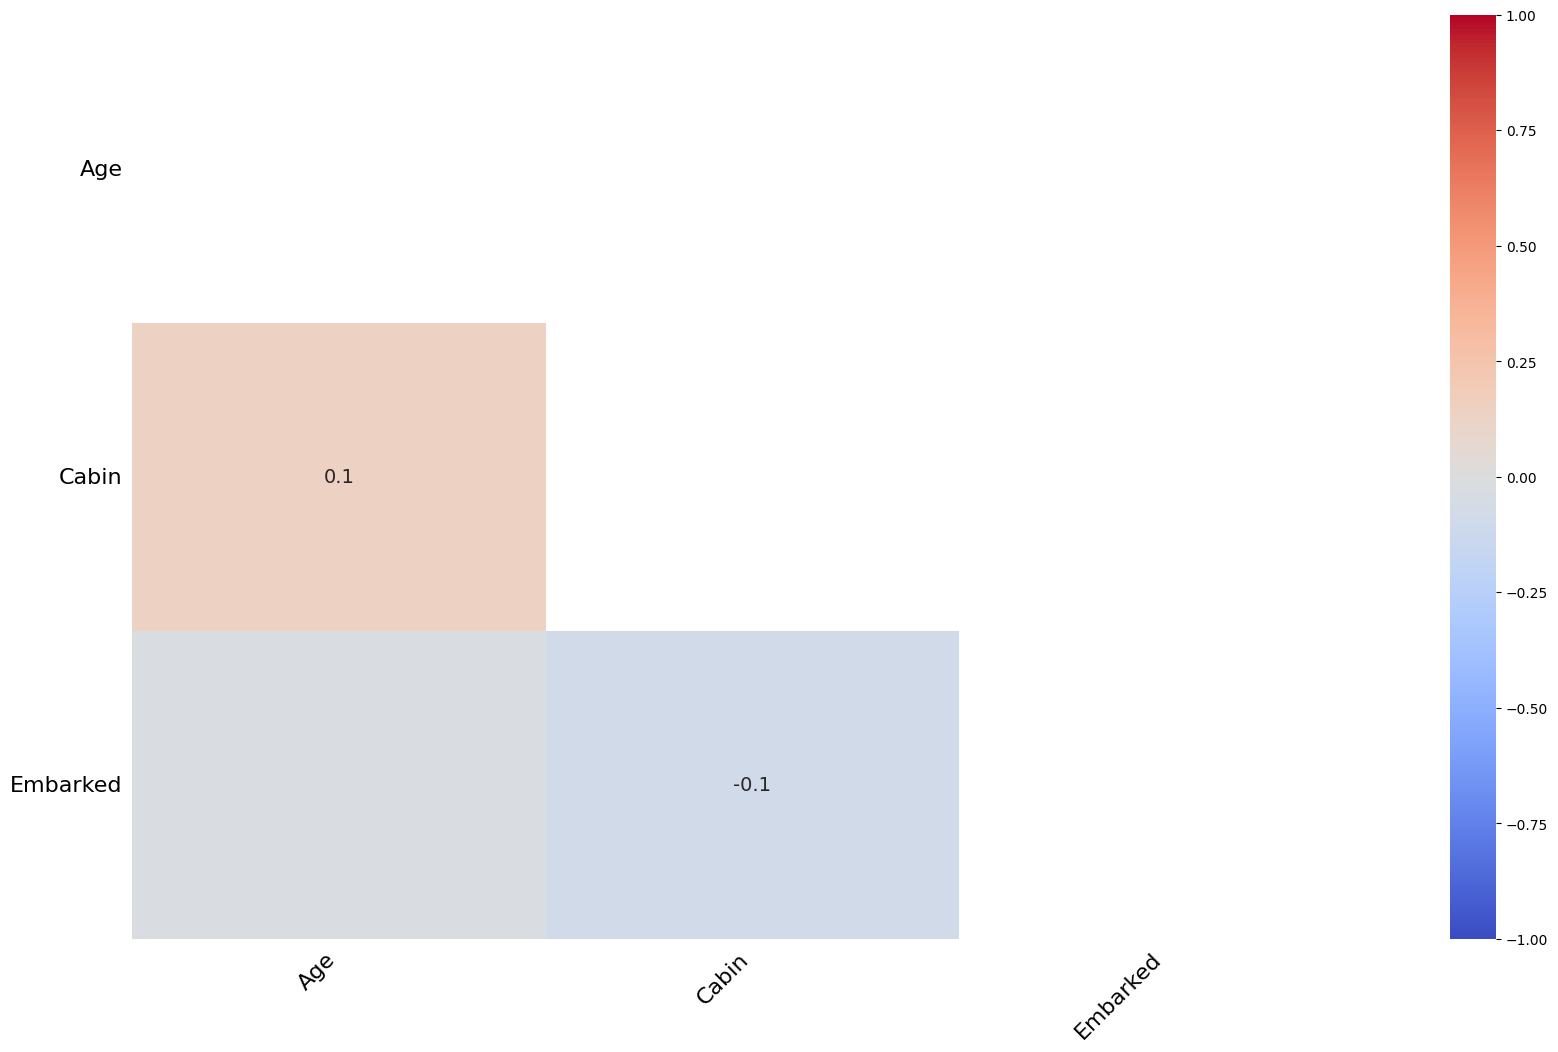

In [39]:
import seaborn as sns
sns.set_palette("coolwarm")  # أو جرب غيرها
msno.heatmap(df, cmap="coolwarm")
plt.show()


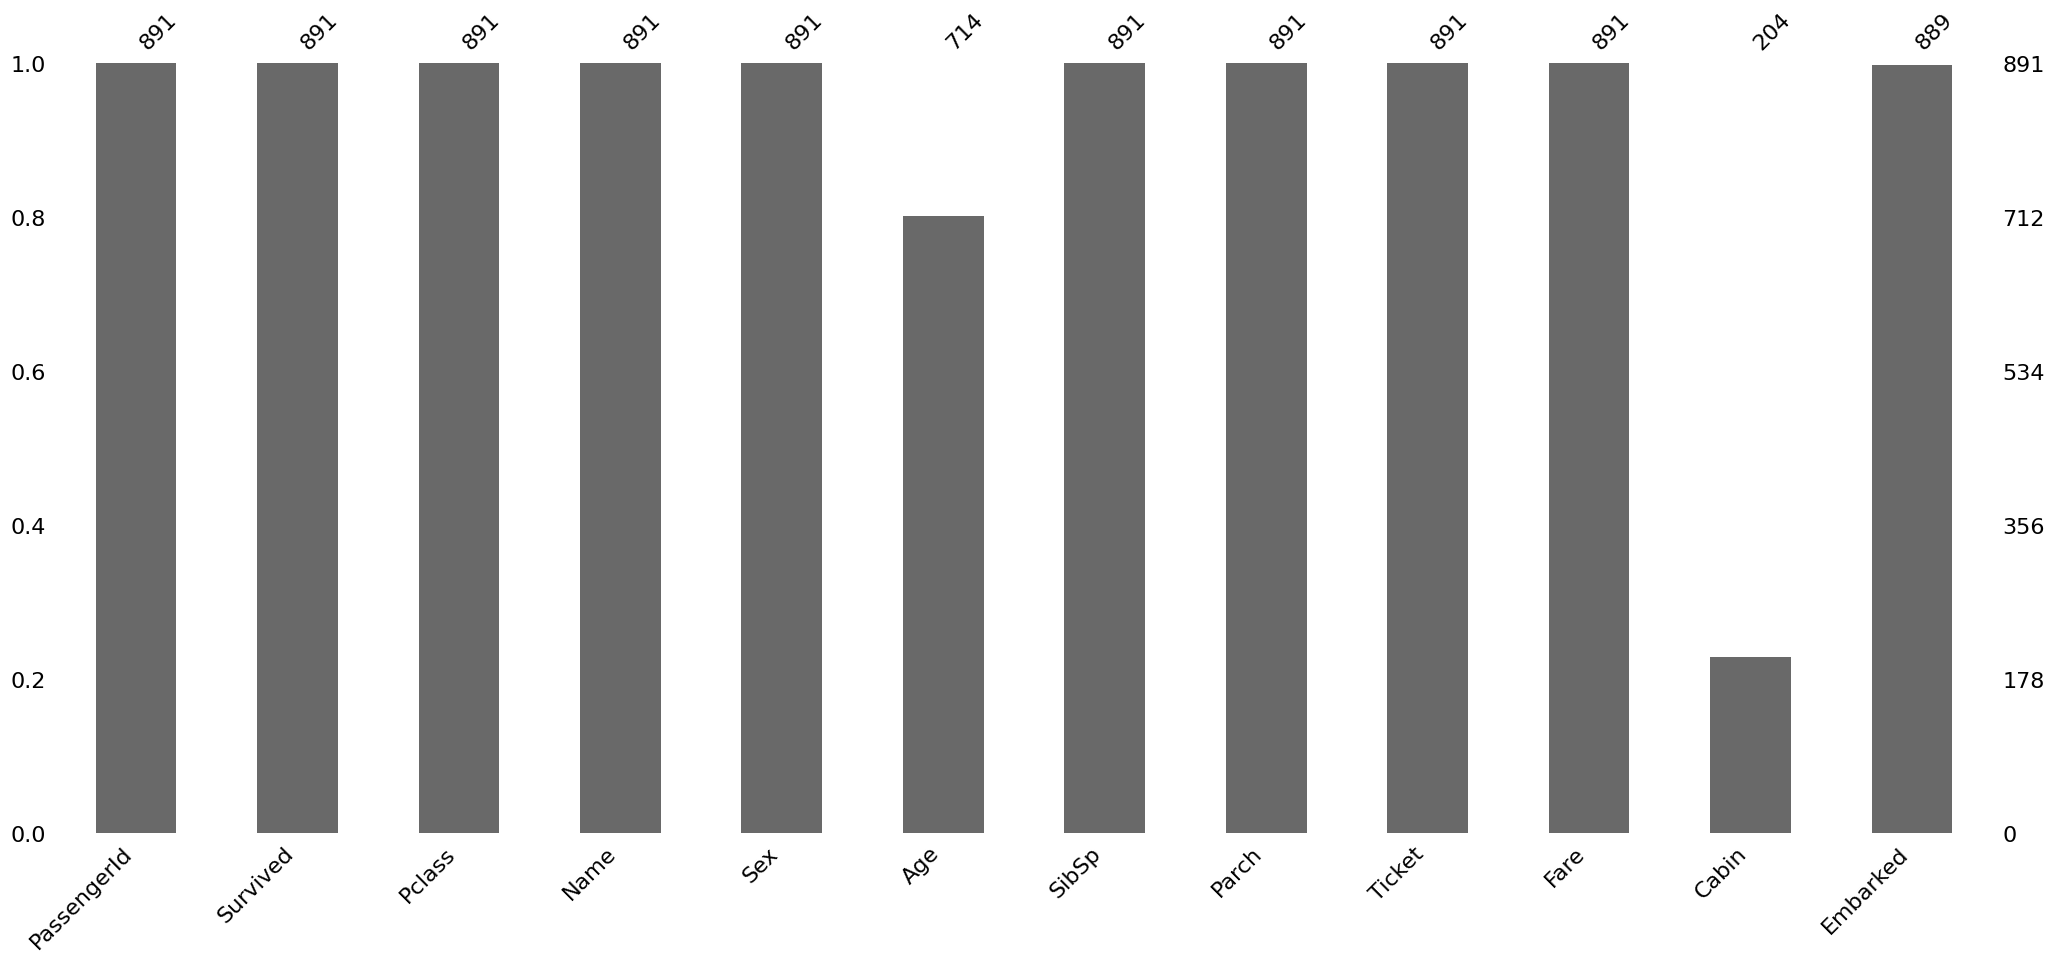

In [40]:
msno.bar(df)
plt.show()


# relationship between sex and survive

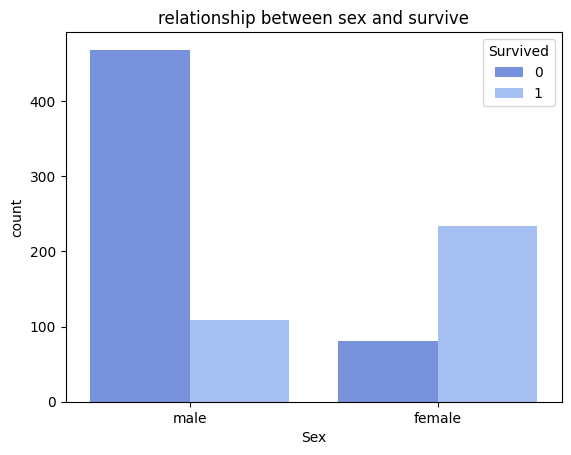

In [41]:
import seaborn as sns
sns.countplot(data=df,x="Sex",hue="Survived")
plt.title("relationship between sex and survive")
plt.show()

In [42]:
df.groupby("Sex")["Survived"].mean()*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

# relationship between class and survive

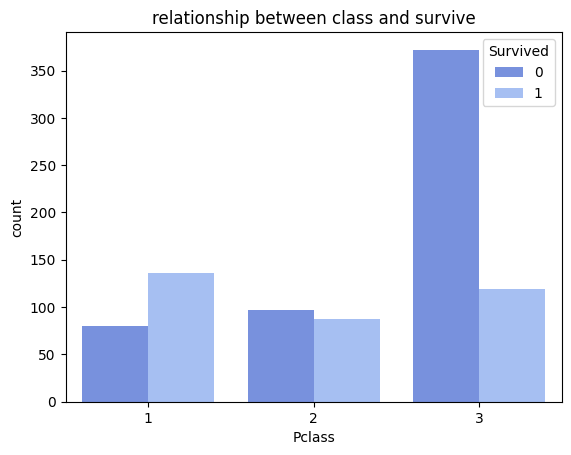

In [43]:
sns.countplot(data=df,x="Pclass",hue="Survived")
plt.title("relationship between class and survive")
plt.show()

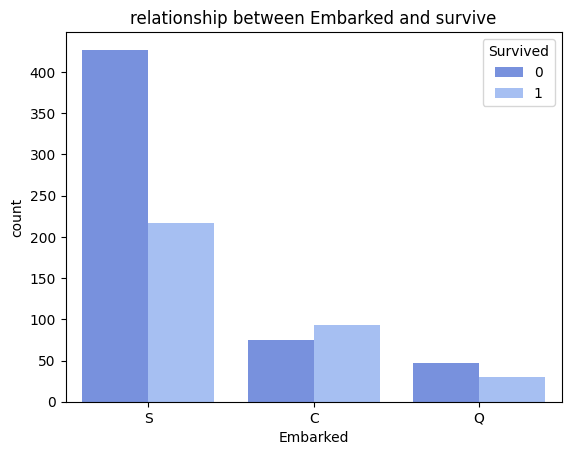

In [44]:
sns.countplot(data=df,x="Embarked",hue="Survived")
plt.title("relationship between Embarked and survive")
plt.show()

In [45]:
df.groupby("Embarked")["Survived"].mean()*100

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

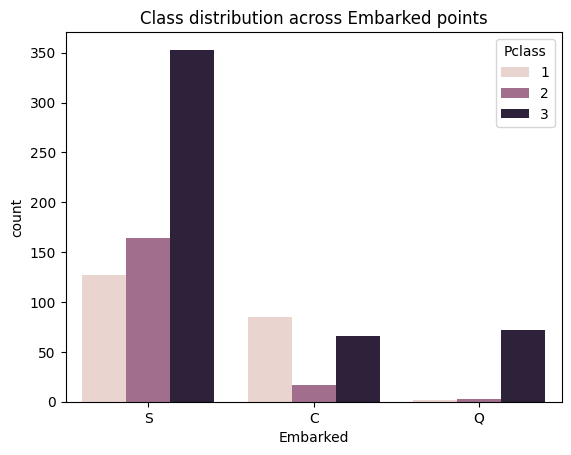

In [46]:
sns.countplot(data=df, x='Embarked', hue='Pclass')
plt.title('Class distribution across Embarked points')
plt.show()


# Data Cleaning

## handling missing values

In [47]:
import numpy as np
#replace NaN in age with median value
df["Age"]=df["Age"].fillna(df.groupby("Pclass")["Age"].transform("median"))
print(df["Age"].isnull().sum())

0


In [48]:
#delete un important column 
df=df.drop(columns=["Cabin","Name", "Ticket"])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [49]:
#replace NaN in Embarked with mode
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])
print(df["Embarked"].isnull().sum())

0


## Encoding for modeling

In [50]:
df["Sex"]=df["Sex"].map({"male":0,"female":1})
df[["Sex"]].head()

,Sex
0,0
1,1
2,1
3,1
4,0


In [51]:
df["Embarked"]=df["Embarked"].map({"S":0,"C":1,"Q":2})
df[["Embarked"]].head()

,Embarked
0,0
1,1
2,0
3,0
4,0


In [52]:
# checking
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


# Feature Engineering

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# add features for model improvemnt
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 12, 18, 35, 60, 100], labels=[0, 1, 2, 3, 4])

# Extract features for model
features=["Pclass","Sex","AgeGroup","SibSp","Fare","Embarked","FamilySize"]
x=df[features]
y=df["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
#Scaling
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Random Forest Model

In [55]:
from sklearn.ensemble import RandomForestClassifier

#model training
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [56]:
#model prediction
y_pred_rf=rf_model.predict(x_test)

In [57]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred_rf)
print(f"rf_model accuracy is : {accuracy:.2%}%")

rf_model accuracy is : 82.12%%


In [58]:
# saving the best model
import joblib
joblib.dump(rf_model, "titanic_model.pkl")

['titanic_model.pkl']

# test Dataset

In [59]:
df2=pd.read_csv("test.csv")
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# handling missing values & encoding

In [60]:
df2["Age"]=df2["Age"].fillna(df2.groupby("Pclass")["Age"].transform("median"))
df2["Fare"]=df2["Fare"].fillna(df2["Fare"].median())
df2["Embarked"]=df2["Embarked"].fillna(df2["Embarked"].mode()[0])
df2=df2.drop(columns=["Cabin","Name", "Ticket"])
print(df2.isnull().sum())

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [61]:
df2["Sex"]=df2["Sex"].map({"male":0,"female":1})
df2["Embarked"]=df2["Embarked"].map({"S":0,"C":1,"Q":2})
df2[["Sex","Embarked"]].head()

,Sex,Embarked
0,0,2
1,1,0
2,0,2
3,0,0
4,1,0


In [62]:
# add features for model improvemnt
df2["FamilySize"] = df2["SibSp"] + df2["Parch"] + 1
df2["AgeGroup"] = pd.cut(df2["Age"], bins=[0, 12, 18, 35, 60, 100], labels=[0, 1, 2, 3, 4])


In [63]:
X_submission = df2[features]
X_submission = scaler.transform(X_submission)
rf_model = joblib.load("titanic_model.pkl")
predictions = rf_model.predict(X_submission)


In [64]:
submission = pd.DataFrame({
    "PassengerId": df2["PassengerId"],
    "Survived": predictions
})
submission.to_csv("submission.csv", index=False)
